In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pymc3 as pm
import arviz as az 
import os

In [4]:
# load mtcars
d = pd.read_csv('mtcars.csv')

In [5]:
d.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
## number of observations
len(d)

32

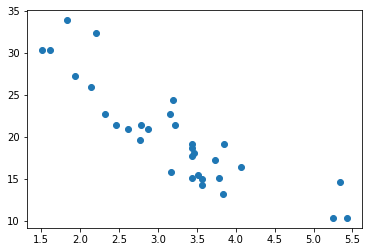

In [7]:
# plot relationship beteen weight and mph

plt.scatter(x = d['wt'], y = d['mpg'])

<AxesSubplot:xlabel='wt', ylabel='Density'>

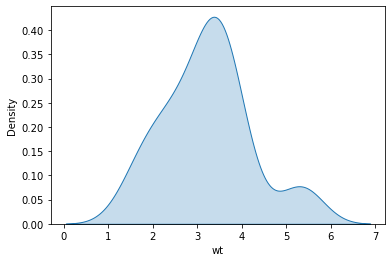

In [8]:
sns.kdeplot(d['wt'], shade = True)

<AxesSubplot:xlabel='mpg', ylabel='Density'>

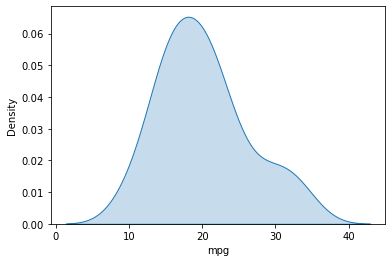

In [9]:
sns.kdeplot(d['mpg'], shade = True)

In [10]:
d['wt'].quantile([0, 0.25, 0.5, 0.75, 1]).round(2)

0.00    1.51
0.25    2.58
0.50    3.32
0.75    3.61
1.00    5.42
Name: wt, dtype: float64

In [11]:
d['mpg'].quantile([0, 0.25, 0.5, 0.75, 1]).round(2)

0.00    10.40
0.25    15.42
0.50    19.20
0.75    22.80
1.00    33.90
Name: mpg, dtype: float64

In [12]:
d[['wt', 'mpg']].describe().round(2)

,wt,mpg
count,32.00,32.00
mean,3.22,20.09
std,0.98,6.03
min,1.51,10.40
25%,2.58,15.42
50%,3.32,19.20
75%,3.61,22.80
max,5.42,33.90


## Linear Model

In [13]:
import statsmodels.api as sm

In [14]:
x = d['wt']
y = d['mpg']

x = sm.add_constant(x)

fit = sm.OLS(y, x).fit()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.29e-10
Time:                        05:48:33   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
## model coefficients
fit.params

const    37.285126
wt       -5.344472
dtype: float64

In [17]:
## coefficient standard errors
fit.bse

const    1.877627
wt       0.559101
dtype: float64

## Bayesian Regression

* We will fit a Bayesian model to the same data
* The priors will be specified as normal with a prior intercept of 40 ± 10 and a prior beta for the 'wt' variable of 0 ± 10
* These priors were created by first looking at the data that has been collected (which is cheating). Normally we would have priors BEFORE collecting our data and then combine the prior with the observations to obtain a posterior distribution. The aim here is to simply understand the code.

In [18]:
## fit model
with pm.Model() as fit_b:
    a = pm.Normal('a', mu = 40, sd = 10)
    b = pm.Normal('b', mu = 0, sd = 10)
    e = pm.HalfCauchy('e', 5)
    
    y_pred = pm.Normal('y_pred', mu = a + b * d['wt'], sd = e, observed = d['mpg'])
    
    trace_b = pm.sample(2000, tune = 1000)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [e, b, a]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 14 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'e'}>]], dtype=object)

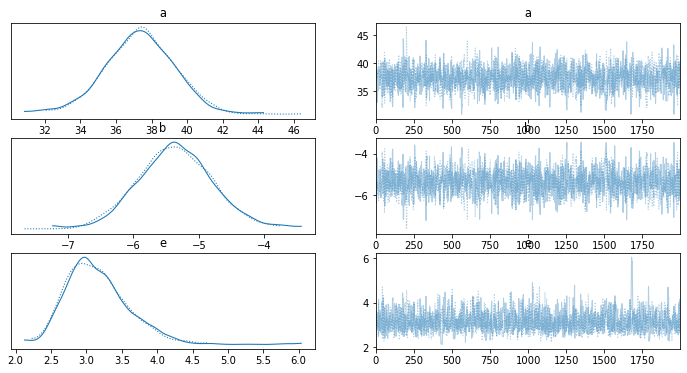

In [19]:
## trace plots
az.plot_trace(trace_b, var_names = ['a', 'b', 'e'])

* Our model was named as `model_b` above
* The sample from our Markov Chain was named `trace_b`. We can use this to obtain info about the coefficients and make draws from the posterior.

In [20]:
## Coefficients
trace_b['a'].mean(), trace_b['b'].mean()

(37.33663579074219, -5.358756189126376)

In [21]:
## Coefficient SD
trace_b['a'].std(), trace_b['b'].std()

(1.947797078798463, 0.5828199037385996)

(array([4.000e+01, 1.420e+02, 5.010e+02, 1.059e+03, 1.262e+03, 7.290e+02,
        2.230e+02, 3.200e+01, 1.100e+01, 1.000e+00]),
 array([30.84559576, 32.40383583, 33.9620759 , 35.52031598, 37.07855605,
        38.63679612, 40.19503619, 41.75327626, 43.31151633, 44.8697564 ,
        46.42799648]),
 <BarContainer object of 10 artists>)

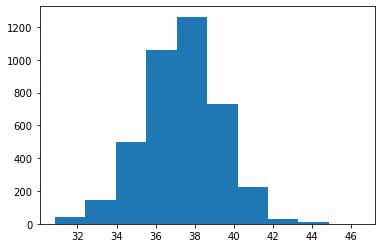

In [22]:
## plot the posterior draws for the intercept

plt.hist(trace_b['a'])

(array([1.550e+02, 1.084e+03, 1.454e+03, 8.250e+02, 3.660e+02, 9.100e+01,
        1.600e+01, 1.000e+00, 1.000e+00, 7.000e+00]),
 array([2.12066445, 2.51263087, 2.90459728, 3.2965637 , 3.68853011,
        4.08049653, 4.47246294, 4.86442936, 5.25639577, 5.64836219,
        6.0403286 ]),
 <BarContainer object of 10 artists>)

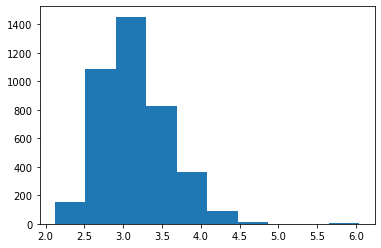

In [23]:
## plot the posterior draws for the wt coefficient

plt.hist(trace_b['e'])

## 1. Point Predictions

* Make a single point prediction for the `mpg` would expect, on average, when `wt` is a certain value (in this example `wt = 3.3`)

In [24]:
## save coefficient averages
alpha_m = trace_b['a'].mean()
beta_m = trace_b['b'].mean()

In [25]:
alpha_m, beta_m

(37.33663579074219, -5.358756189126376)

In [26]:
## new weight
new_wt = 3.3

In [27]:
# make prediction of mpg
alpha_m + beta_m * new_wt

19.652740366625153

In [28]:
# point prediction for the entire data set
d['point_pred'] = alpha_m + beta_m * d['wt']

In [29]:
d.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,point_pred
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,23.296695
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.930212
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,24.904321
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,20.108235
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.902515


In [30]:
resid = d['mpg'] - d['point_pred']

<AxesSubplot:ylabel='Density'>

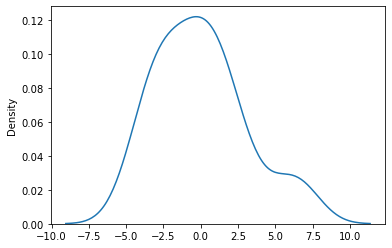

In [31]:
sns.kdeplot(resid)

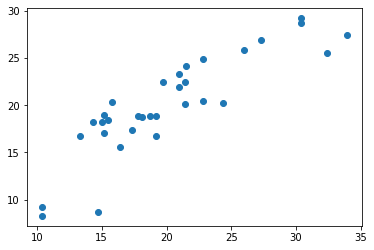

In [32]:
plt.scatter(x = d['mpg'], y = d['point_pred'])

In [33]:
## rmse
resid2 = resid**2
np.sqrt(resid2.mean())

2.949199997706439

## 2. Point Prediction with Uncertainty

* We compliment the point prediction with a uncertainty interval.
* The point prediction ± uncertainty interval informs us of the average value of `mpg` along with the uncertainty of the coefficients in our model.

In [34]:
## 1000 random draws from the posterior row ids
draws_id = np.random.randint(0, len(trace_b['a']), size = 1000)

In [35]:
draws_id[0:5]

array([ 154, 2072, 1122, 3966, 1638])

In [36]:
# extract the random ids from the intercept and coefficient traces
intercept_sample = trace_b['a'][draws_id]
beta_sample = trace_b['b'][draws_id]

In [37]:
# create 1000 repeats of the new weight
new_wt_rep = np.repeat(new_wt, repeats = 1000)

In [38]:
# make a vector of predictions
point_pred_uncertainty = intercept_sample + beta_sample * new_wt_rep

(array([  1.,  15.,  22., 107., 166., 270., 237., 140.,  33.,   9.]),
 array([17.56891784, 17.94186603, 18.31481422, 18.6877624 , 19.06071059,
        19.43365877, 19.80660696, 20.17955514, 20.55250333, 20.92545151,
        21.2983997 ]),
 <BarContainer object of 10 artists>)

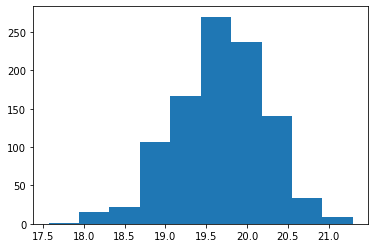

In [39]:
plt.hist(point_pred_uncertainty)

In [40]:
point_pred_uncertainty.mean(), point_pred_uncertainty.std()

(19.67098850394974, 0.5618677843922413)

In [41]:
## 90% Quantile Interval
np.quantile(point_pred_uncertainty, [0.05, 0.5, 0.95])

array([18.75310224, 19.70141562, 20.51377782])

## 3. Predictive Distribution for a new observation in the population

* This represents the `mpg` for a new car with a specific `wt`.
* The uncertainty in this predictive distribution will be larger than the point prediction with uncertainty because we are using the posterior model error added to our prediction.

In [42]:
## random draws from the model error
sigma_sample = trace_b['e'][draws_id]

In [43]:
pred_dist = intercept_sample + beta_sample * new_wt_rep + np.random.normal(loc = 0, scale = sigma_sample, size = 1000)

(array([  3.,  13.,  73., 158., 286., 265., 155.,  37.,   8.,   2.]),
 array([ 8.40579999, 10.73363928, 13.06147857, 15.38931787, 17.71715716,
        20.04499645, 22.37283575, 24.70067504, 27.02851434, 29.35635363,
        31.68419292]),
 <BarContainer object of 10 artists>)

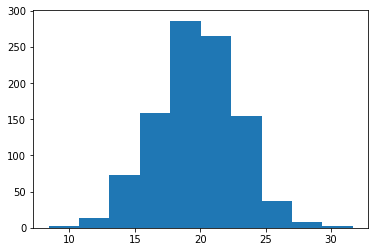

In [44]:
plt.hist(pred_dist)

In [45]:
pred_dist.mean(), pred_dist.std()

(19.723608716903797, 3.1146874333718717)

In [46]:
## 90% Quantile Interval
np.quantile(pred_dist, [0.05, 0.5, 0.95])

array([14.38619984, 19.7672159 , 24.54463523])